# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [198]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [199]:
# Set the API base URL
url = "https://api.openweathermap.org"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"/data/2.5/weather?q={city}&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khed brahma
Processing Record 2 of Set 1 | batagay-alyta
Processing Record 3 of Set 1 | nurota
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | parras
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | provideniy

Processing Record 35 of Set 4 | yirol
City not found. Skipping...
Processing Record 36 of Set 4 | albanel
Processing Record 37 of Set 4 | bredasdorp
Processing Record 38 of Set 4 | shitanjing
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | owando
Processing Record 41 of Set 4 | buin
Processing Record 42 of Set 4 | leshukonskoye
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | eyl
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | matara
Processing Record 0 of Set 5 | asbestos
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | wageningen
Processin

Processing Record 20 of Set 8 | vidim
Processing Record 21 of Set 8 | roald
Processing Record 22 of Set 8 | rapid valley
Processing Record 23 of Set 8 | saint-joseph
Processing Record 24 of Set 8 | betma
Processing Record 25 of Set 8 | port-gentil
Processing Record 26 of Set 8 | jimenez
Processing Record 27 of Set 8 | konevo
Processing Record 28 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 29 of Set 8 | trelew
Processing Record 30 of Set 8 | novo cruzeiro
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | ucluelet
Processing Record 33 of Set 8 | birjand
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | atamanskaya
Processing Record 36 of Set 8 | megion
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | verkhoyansk
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | llangefni
Processing Record 41 of Set 8 | ravar
Processing Record 42 of Set 8 | luwuk
Processing Record 43 of Set 8 | h

Processing Record 4 of Set 12 | humaita
Processing Record 5 of Set 12 | marsa matruh
Processing Record 6 of Set 12 | ondjiva
Processing Record 7 of Set 12 | antalaha
Processing Record 8 of Set 12 | leningradskiy
Processing Record 9 of Set 12 | marsh harbour
Processing Record 10 of Set 12 | warqla
City not found. Skipping...
Processing Record 11 of Set 12 | bandarbeyla
Processing Record 12 of Set 12 | mackenzie
Processing Record 13 of Set 12 | berlevag
Processing Record 14 of Set 12 | requena
Processing Record 15 of Set 12 | ouesso
Processing Record 16 of Set 12 | nichinan
Processing Record 17 of Set 12 | alice springs
Processing Record 18 of Set 12 | pochutla
Processing Record 19 of Set 12 | kumphawapi
Processing Record 20 of Set 12 | srandakan
Processing Record 21 of Set 12 | kadaya
Processing Record 22 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | kozhva
Processing Record 25 of Set 12 | harper
Processing Recor

In [200]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [201]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khed brahma,24.0333,73.0500,300.07,33,98,0.62,IN,1681415572
1,batagay-alyta,67.8006,130.4114,255.22,91,99,1.83,RU,1681415573
2,nurota,40.5614,65.6886,299.46,19,100,7.05,UZ,1681415573
3,vaini,-21.2000,-175.2000,299.24,83,20,3.09,TO,1681415135
4,port alfred,-33.5906,26.8910,288.25,92,14,0.45,ZA,1681415142


In [202]:
# convert Kelvin to Celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khed brahma,24.0333,73.0500,26.92,33,98,0.62,IN,1681415572
1,batagay-alyta,67.8006,130.4114,-17.93,91,99,1.83,RU,1681415573
2,nurota,40.5614,65.6886,26.31,19,100,7.05,UZ,1681415573
3,vaini,-21.2000,-175.2000,26.09,83,20,3.09,TO,1681415135
4,port alfred,-33.5906,26.8910,15.10,92,14,0.45,ZA,1681415142


In [203]:
# Export the City_Data into a csv
# Creating the output_data directory if it doesn't exist
isExists = os.path.isdir("output_data")
if not isExists:
    os.mkdir("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [204]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khed brahma,24.0333,73.0500,26.92,33,98,0.62,IN,1681415572
1,batagay-alyta,67.8006,130.4114,-17.93,91,99,1.83,RU,1681415573
2,nurota,40.5614,65.6886,26.31,19,100,7.05,UZ,1681415573
3,vaini,-21.2000,-175.2000,26.09,83,20,3.09,TO,1681415135
4,port alfred,-33.5906,26.8910,15.10,92,14,0.45,ZA,1681415142


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

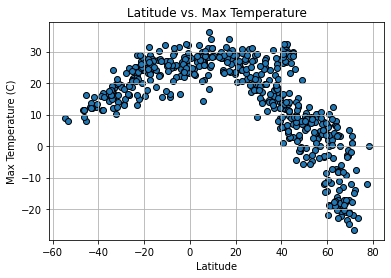

In [205]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(latitude, temp, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

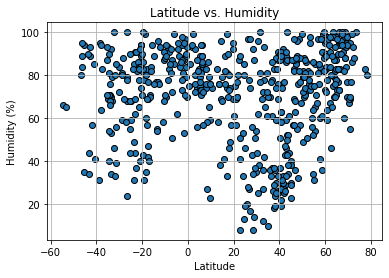

In [206]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity'].astype("float")
plt.scatter(latitude, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

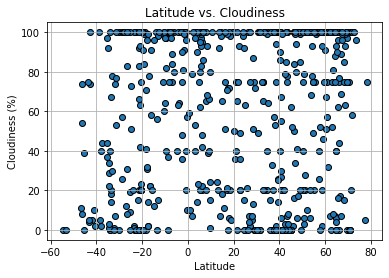

In [207]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

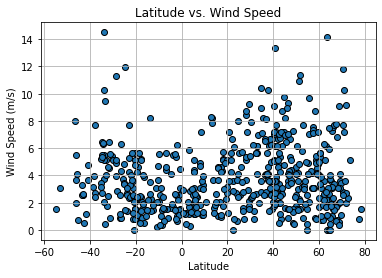

In [208]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [209]:
# Define a function to create Linear Regression plots
def linreg(x_axis, y_axis, xlabel, ylabel, title, xpos, ypos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print("The r-value is " + str(rvalue) + ".")
    regress_values = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(xpos, ypos),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return str(rvalue)

In [210]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khed brahma,24.0333,73.0500,26.92,33,98,0.62,IN,1681415572
1,batagay-alyta,67.8006,130.4114,-17.93,91,99,1.83,RU,1681415573
2,nurota,40.5614,65.6886,26.31,19,100,7.05,UZ,1681415573
5,pevek,69.7008,170.3133,-17.18,95,97,1.08,RU,1681415294
6,tuktoyaktuk,69.4541,-133.0374,-21.00,77,75,3.60,CA,1681415257


In [211]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vaini,-21.2000,-175.2000,26.09,83,20,3.09,TO,1681415135
4,port alfred,-33.5906,26.8910,15.10,92,14,0.45,ZA,1681415142
8,luderitz,-26.6481,15.1594,16.10,68,31,6.32,NaN,1681415312
11,faanui,-16.4833,-151.7500,27.66,71,22,3.86,PF,1681415215
14,saint-philippe,-21.3585,55.7679,24.77,83,66,0.82,RE,1681415153


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8347628568500959.


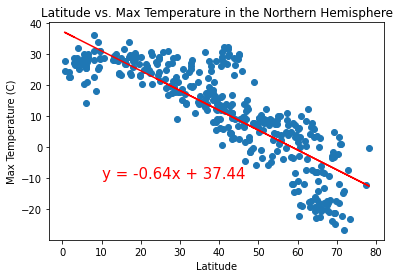

In [212]:
# Linear regression on Northern Hemisphere
northern_hemi_lat = northern_hemi_df['Lat']
rval1 = linreg(northern_hemi_lat, northern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)", "Latitude vs. Max Temperature in the Northern Hemisphere", 10, -10)

The r-value is 0.7629207289561886.


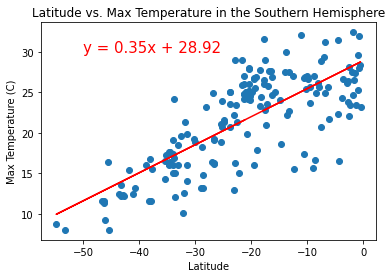

In [213]:
# Linear regression on Southern Hemisphere
southern_hemi_lat = southern_hemi_df['Lat']
rval2 = linreg(southern_hemi_lat, southern_hemi_df['Max Temp'], "Latitude", "Max Temperature (C)", "Latitude vs. Max Temperature in the Southern Hemisphere", -50, 30)

In [214]:
from IPython.display import Markdown as md
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between latitude and temperature, with an r-value of {rval1}. In the southern hemisphere there is a moderate correlation between latitude and temperature, with an r-value of only {rval2}. Although, when we plot both hemispheres on the same graph, it is clear that a parabolic regression that reaches its apex near the equator would fit the data better than linear regressions do.")

**Discussion about the linear relationship:** In the northern hemisphere there is a strong negative correlation between latitude and temperature, with an r-value of -0.8347628568500959. In the southern hemisphere there is a moderate correlation between latitude and temperature, with an r-value of only 0.7629207289561886. Although, when we plot both hemispheres on the same graph, it is clear that a parabolic regression that reaches its apex near the equator would fit the data better than linear regressions do.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1884875463650633.


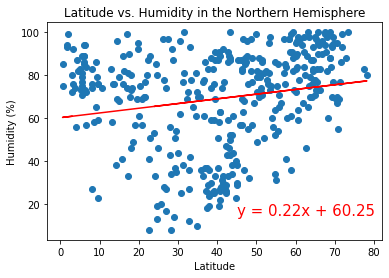

In [215]:
# Northern Hemisphere
rval3 = linreg(northern_hemi_lat, northern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity in the Northern Hemisphere", 45, 15)

The r-value is 0.24131244604392432.


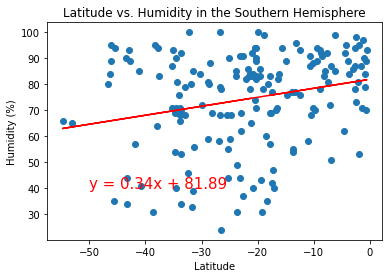

In [216]:
# Southern Hemisphere
rval4 = linreg(southern_hemi_lat, southern_hemi_df['Humidity'], "Latitude", "Humidity (%)", "Latitude vs. Humidity in the Southern Hemisphere", -50, 40)

In [217]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of {rval3}. In the southern hemisphere there is also a very weak correlation between latitude and humidity, with an r-value of only {rval4}. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.")

**Discussion about the linear relationship:** In the northern hemisphere there is a very weak correlation between latitude and humidity, with an r-value of 0.1884875463650633. In the southern hemisphere there is also a very weak correlation between latitude and humidity, with an r-value of only 0.24131244604392432. Overall, linear regressions do not seem to fit this data very well, and there is little correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08222207503332493.


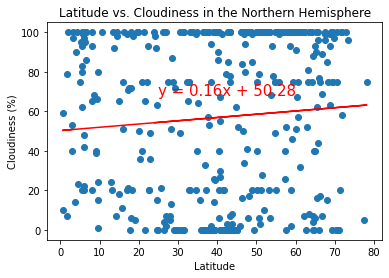

In [218]:
# Northern Hemisphere
rval5 = linreg(northern_hemi_lat, northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness in the Northern Hemisphere", 25, 68)

The r-value is 0.3727191386100612.


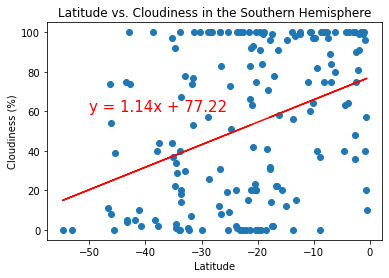

In [219]:
# Southern Hemisphere
rval6 = linreg(southern_hemi_lat, southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness in the Southern Hemisphere", -50, 60)

In [220]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of {rval5}. In the southern hemisphere, there is a slight correlation between latitude and cloudiness, with an r-value of {rval6}. Overall, these linear regressions do not seem to fit these data very well, and there is little correlation between latitude and cloudiness. ") 
   # One thing that is perhaps worth noting, however, is that there appear to be clusers of points around (-25, 0) and (-5, 100) on the southern hemisphere plot, indicating that there are a number of cities around the equator that have lots of clouds and a number of cities around latitude -25 that have almost no clouds. 

**Discussion about the linear relationship:** In the northern hemisphere there is almost no correlation between latitude and cloudiness, with an r-value of 0.08222207503332493. In the southern hemisphere, there is a slight correlation between latitude and cloudiness, with an r-value of 0.3727191386100612. Overall, these linear regressions do not seem to fit these data very well, and there is little correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0914160489940128.


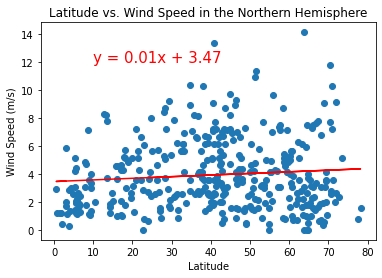

In [221]:
# Northern Hemisphere
rval7 = linreg(northern_hemi_lat, northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed in the Northern Hemisphere", 10, 12)

The r-value is -0.26598876391293735.


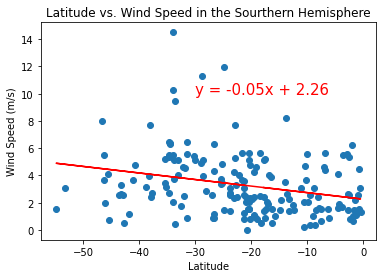

In [222]:
# Southern Hemisphere
rval8 = linreg(southern_hemi_lat, southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed in the Sourthern Hemisphere", -30, 10)

In [223]:
md(f"**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of {rval7}. In the southern hemisphere there is just a slight negative correlation between latitude and wind speed, with an r-value of {rval8}.")

**Discussion about the linear relationship:** In the northern hemisphere, there is almost no correlation between latitude and wind speed, with an r-value of 0.0914160489940128. In the southern hemisphere there is just a slight negative correlation between latitude and wind speed, with an r-value of -0.26598876391293735.